Enter the number of colors in the compressed image, default = 16
16


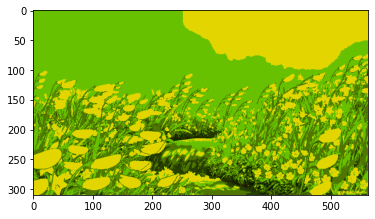

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import imageio

def read_image():
  img = imageio.imread('/content/sample_data/grass.jpg')

  img = img / 255

  return img

def initialize_means(img, clusters):
  points = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))

  m, n = points.shape

  means = np.zeros((clusters, n))

  for i in range(clusters):
    rand1 = int(np.random.random(1)*10)
    rand2 = int(np.random.random(1)*8)
    means[i, 0] = points[rand1, 0]
    means[i, 1] = points[rand2, 1]

  return points, means

def distance(x1, y1, x2, y2):
  dist = np.square(x1 - x2) + np.square(y1 - y2)
  dist = np.sqrt(dist)

  return dist

def k_means(points, means, clusters):
  iterations = 10
  m, n = points.shape

  index = np.zeros(m)

  while (iterations > 0):

    for j in range(len(points)):
      minv = 1000
      temp = None

      for k in range(clusters):
        x1 = points[j, 0]
        y1 = points[j, 1]
        x2 = means[k, 0]
        y2 = means[k, 1]

        if (distance(x1, y1, x2, y2) < minv):
          minv = distance(x1, y1, x2, y2)
          temp = k
          index[j] = k

    for k in range(clusters):
      sumx = 0
      sumy = 0
      count = 0

      for j in range(len(points)):
        if (index[j] == k):
          sumx += points[j, 0]
          sumy += points[j, 1]
          count += 1

      if (count == 0):
        count = 1

      means[k, 0] = float(sumx / count)
      means[k, 1] = float(sumy / count)

    iterations -= 1
  
  return means, index

def compress_image(means, index, img):
  centroid = np.array(means)
  recovered = centroid[index.astype(int), :]

  recovered = np.reshape(recovered, (img.shape[0], img.shape[1], img.shape[2]))

  plt.imshow(recovered)
  plt.show()

  imageio.imsave('compressed_' + str(clusters) + '_colors.jpg', recovered)

if __name__ == '__main__':
  img = read_image()

  clusters = 16
  clusters = int(input('Enter the number of colors in the compressed image, default = 16\n'))

  points, means = initialize_means(img, clusters)
  means, index = k_means(points, means, clusters)
  compress_image(means, index, img)